In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

In [2]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 784)


In [3]:
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

In [4]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()
g.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               8

In [5]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d =create_discriminator()
d.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

In [6]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               1486352   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [7]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

  0%|                                                                                          | 0/128 [00:00<?, ?it/s]

Epoch 1


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.62it/s]

Epoch 2


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 3


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.00it/s]

Epoch 4


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.33it/s]

Epoch 5


  1%|▋                                                                                 | 1/128 [00:00<00:16,  7.75it/s]

Epoch 6


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 7


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.20it/s]

Epoch 8


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.93it/s]

Epoch 9


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.93it/s]

Epoch 10


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.20it/s]

Epoch 11


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.13it/s]

Epoch 12


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.47it/s]

Epoch 13


  1%|▋                                                                                 | 1/128 [00:00<00:16,  7.87it/s]

Epoch 14


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.20it/s]

Epoch 15


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.55it/s]

Epoch 16


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.20it/s]

Epoch 17


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.55it/s]

Epoch 18


  1%|▋                                                                                 | 1/128 [00:00<00:19,  6.49it/s]

Epoch 19


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.06it/s]

Epoch 20


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 21


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 22


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.71it/s]

Epoch 23


  2%|█▎                                                                                | 2/128 [00:00<00:12,  9.95it/s]

Epoch 24


  1%|▋                                                                                 | 1/128 [00:00<00:12,  9.80it/s]

Epoch 25


  0%|                                                                                          | 0/128 [00:00<?, ?it/s]

Epoch 26


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.20it/s]

Epoch 27


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.42it/s]

Epoch 28


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 29


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.71it/s]

Epoch 30


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 31


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 32


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 33


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.77it/s]

Epoch 34


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.61it/s]

Epoch 35


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.20it/s]

Epoch 36


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.85it/s]

Epoch 37


  1%|▋                                                                                 | 1/128 [00:00<00:12,  9.80it/s]

Epoch 38


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.85it/s]

Epoch 39


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 40


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 41


  1%|▋                                                                                 | 1/128 [00:00<00:12,  9.80it/s]

Epoch 42


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.47it/s]

Epoch 43


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.71it/s]

Epoch 44


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 45


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.40it/s]

Epoch 46


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 47


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.85it/s]

Epoch 48


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 49


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 50


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 51


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.61it/s]

Epoch 52


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 53


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.36it/s]

Epoch 54


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 55


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 56


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 57


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 58


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.61it/s]

Epoch 59


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.85it/s]

Epoch 60


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 61


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 62


  1%|▋                                                                                 | 1/128 [00:00<00:12,  9.90it/s]

Epoch 63


  2%|█▎                                                                                | 2/128 [00:00<00:12,  9.76it/s]

Epoch 64


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.71it/s]

Epoch 65


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 66


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.70it/s]

Epoch 67


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.48it/s]

Epoch 68


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 69


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.70it/s]

Epoch 70


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 71


  1%|▋                                                                                 | 1/128 [00:00<00:12,  9.90it/s]

Epoch 72


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 73


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.30it/s]

Epoch 74


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.71it/s]

Epoch 75


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 76


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.85it/s]

Epoch 77


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 78


  1%|▋                                                                                 | 1/128 [00:00<00:12,  9.80it/s]

Epoch 79


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.62it/s]

Epoch 80


  1%|▋                                                                                 | 1/128 [00:00<00:12,  9.90it/s]

Epoch 81


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.47it/s]

Epoch 82


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 83


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.62it/s]

Epoch 84


  2%|█▎                                                                                | 2/128 [00:00<00:11, 10.64it/s]

Epoch 85


  2%|█▎                                                                                | 2/128 [00:00<00:12,  9.74it/s]

Epoch 86


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 87


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 88


  1%|▋                                                                                 | 1/128 [00:00<00:12,  9.80it/s]

Epoch 89


  2%|█▎                                                                                | 2/128 [00:00<00:12,  9.71it/s]

Epoch 90


  2%|█▎                                                                                | 2/128 [00:00<00:12,  9.76it/s]

Epoch 91


  2%|█▎                                                                                | 2/128 [00:00<00:12,  9.93it/s]

Epoch 92


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.71it/s]

Epoch 93


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 94


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.71it/s]

Epoch 95


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.71it/s]

Epoch 96


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 97


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.57it/s]

Epoch 98


  2%|█▎                                                                                | 2/128 [00:00<00:12,  9.86it/s]

Epoch 99


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.05it/s]

Epoch 100


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.71it/s]

Epoch 101


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.10it/s]

Epoch 102


  1%|▋                                                                                 | 1/128 [00:00<00:12, 10.00it/s]

Epoch 103


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.15it/s]

Epoch 104


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.15it/s]

Epoch 105


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.15it/s]

Epoch 106


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.15it/s]

Epoch 107


  2%|█▎                                                                                | 2/128 [00:00<00:11, 10.53it/s]

Epoch 108


  0%|                                                                                          | 0/128 [00:00<?, ?it/s]

Epoch 109


  1%|▋                                                                                 | 1/128 [00:00<00:12,  9.80it/s]

Epoch 110


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.55it/s]

Epoch 111


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.61it/s]

Epoch 112


  1%|▋                                                                                 | 1/128 [00:00<00:12,  9.90it/s]

Epoch 113


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.10it/s]

Epoch 114


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 115


  0%|                                                                                          | 0/128 [00:00<?, ?it/s]

Epoch 116


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.61it/s]

Epoch 117


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.55it/s]

Epoch 118


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.42it/s]

Epoch 119


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.55it/s]

Epoch 120


  0%|                                                                                          | 0/128 [00:00<?, ?it/s]

Epoch 121


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.77it/s]

Epoch 122


  0%|                                                                                          | 0/128 [00:00<?, ?it/s]

Epoch 123


  2%|█▎                                                                                | 2/128 [00:00<00:11, 10.58it/s]

Epoch 124


  2%|█▎                                                                                | 2/128 [00:00<00:11, 10.69it/s]

Epoch 125


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.00it/s]

Epoch 126


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.26it/s]

Epoch 127


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 128


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 129


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.61it/s]

Epoch 130


  2%|█▎                                                                                | 2/128 [00:00<00:11, 10.58it/s]

Epoch 131


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.71it/s]

Epoch 132


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.31it/s]

Epoch 133


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.47it/s]

Epoch 134


  2%|█▎                                                                                | 2/128 [00:00<00:11, 10.58it/s]

Epoch 135


  1%|▋                                                                                 | 1/128 [00:00<00:12, 10.00it/s]

Epoch 136


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.93it/s]

Epoch 137


  1%|▋                                                                                 | 1/128 [00:00<00:16,  7.81it/s]

Epoch 138


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.41it/s]

Epoch 139


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.47it/s]

Epoch 140


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 141


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.45it/s]

Epoch 142


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 143


  0%|                                                                                          | 0/128 [00:00<?, ?it/s]

Epoch 144


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.60it/s]

Epoch 145


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 146


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 147


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.38it/s]

Epoch 148


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 149


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 150


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 151


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 152


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 153


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 154


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.20it/s]

Epoch 155


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 156


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 157


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 158


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.93it/s]

Epoch 159


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 160


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 161


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 162


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 163


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 164


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 165


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 166


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 167


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 168


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.20it/s]

Epoch 169


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 170


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.60it/s]

Epoch 171


  1%|▋                                                                                 | 1/128 [00:00<00:12,  9.80it/s]

Epoch 172


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 173


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 174


  0%|                                                                                          | 0/128 [00:00<?, ?it/s]

Epoch 175


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 176


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 177


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 178


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.32it/s]

Epoch 179


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 180


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.61it/s]

Epoch 181


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.61it/s]

Epoch 182


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 183


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.61it/s]

Epoch 184


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 185


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 186


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.40it/s]

Epoch 187


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.53it/s]

Epoch 188


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 189


  2%|█▎                                                                                | 2/128 [00:00<00:12, 10.15it/s]

Epoch 190


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 191


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 192


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 193


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.35it/s]

Epoch 194


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 195


  1%|▋                                                                                 | 1/128 [00:00<00:12,  9.80it/s]

Epoch 196


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 197


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 198


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.61it/s]

Epoch 199


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 200


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 201


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 202


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 203


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 204


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.38it/s]

Epoch 205


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.47it/s]

Epoch 206


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 207


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 208


  1%|▋                                                                                 | 1/128 [00:00<00:12,  9.80it/s]

Epoch 209


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 210


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 211


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 212


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 213


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 214


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 215


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 216


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 217


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.71it/s]

Epoch 218


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 219


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 220


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 221


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 222


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 223


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 224


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.33it/s]

Epoch 225


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 226


  2%|█▎                                                                                | 2/128 [00:00<00:12,  9.84it/s]

Epoch 227


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.39it/s]

Epoch 228


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.44it/s]

Epoch 229


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 230


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 231


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 232


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.60it/s]

Epoch 233


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 234


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 235


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 236


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.20it/s]

Epoch 237


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 238


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 239


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 240


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 241


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 242


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 243


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.38it/s]

Epoch 244


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.71it/s]

Epoch 245


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.47it/s]

Epoch 246


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.93it/s]

Epoch 247


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 248


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 249


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 250


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.93it/s]

Epoch 251


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 252


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.62it/s]

Epoch 253


  2%|█▎                                                                                | 2/128 [00:00<00:12,  9.94it/s]

Epoch 254


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 255


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 256


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.45it/s]

Epoch 257


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 258


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 259


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 260


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.34it/s]

Epoch 261


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 262


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.60it/s]

Epoch 263


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 264


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 265


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.85it/s]

Epoch 266


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 267


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 268


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 269


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 270


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 271


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 272


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 273


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 274


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 275


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 276


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 277


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 278


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 279


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.61it/s]

Epoch 280


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 281


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 282


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 283


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 284


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 285


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 286


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 287


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 288


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.26it/s]

Epoch 289


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 290


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 291


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.44it/s]

Epoch 292


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 293


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.52it/s]

Epoch 294


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 295


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 296


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.55it/s]

Epoch 297


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 298


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.93it/s]

Epoch 299


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 300


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 301


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.23it/s]

Epoch 302


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 303


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 304


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 305


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 306


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 307


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 308


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 309


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 310


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.51it/s]

Epoch 311


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 312


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.47it/s]

Epoch 313


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 314


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 315


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 316


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 317


  2%|█▎                                                                                | 2/128 [00:00<00:12,  9.83it/s]

Epoch 318


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 319


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.35it/s]

Epoch 320


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 321


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 322


  1%|▋                                                                                 | 1/128 [00:00<00:12,  9.80it/s]

Epoch 323


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.41it/s]

Epoch 324


  2%|█▎                                                                                | 2/128 [00:00<00:14,  8.95it/s]

Epoch 325


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 326


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.30it/s]

Epoch 327


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.85it/s]

Epoch 328


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 329


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 330


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 331


  2%|█▎                                                                                | 2/128 [00:00<00:12,  9.83it/s]

Epoch 332


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 333


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.30it/s]

Epoch 334


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 335


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.85it/s]

Epoch 336


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.27it/s]

Epoch 337


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 338


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 339


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 340


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 341


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.33it/s]

Epoch 342


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 343


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 344


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 345


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.55it/s]

Epoch 346


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.70it/s]

Epoch 347


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 348


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 349


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 350


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 351


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 352


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 353


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.44it/s]

Epoch 354


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.34it/s]

Epoch 355


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.85it/s]

Epoch 356


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.15it/s]

Epoch 357


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.12it/s]

Epoch 358


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 359


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 360


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 361


  1%|▋                                                                                 | 1/128 [00:00<00:12, 10.00it/s]

Epoch 362


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.61it/s]

Epoch 363


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.47it/s]

Epoch 364


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.93it/s]

Epoch 365


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.40it/s]

Epoch 366


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.85it/s]

Epoch 367


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 368


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 369


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 370


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 371


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.26it/s]

Epoch 372


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 373


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 374


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 375


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 376


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 377


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.93it/s]

Epoch 378


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 379


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.61it/s]

Epoch 380


  1%|▋                                                                                 | 1/128 [00:00<00:14,  9.01it/s]

Epoch 381


  2%|█▎                                                                                | 2/128 [00:00<00:13,  9.47it/s]

Epoch 382


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 383


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.43it/s]

Epoch 384


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 385


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.61it/s]

Epoch 386


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.93it/s]

Epoch 387


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.85it/s]

Epoch 388


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.61it/s]

Epoch 389


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 390


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.93it/s]

Epoch 391


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.17it/s]

Epoch 392


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.26it/s]

Epoch 393


  1%|▋                                                                                 | 1/128 [00:00<00:15,  8.13it/s]

Epoch 394


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 395


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.09it/s]

Epoch 396


  1%|▋                                                                                 | 1/128 [00:00<00:13,  9.35it/s]

Epoch 397


  1%|▋                                                                                 | 1/128 [00:00<00:12, 10.00it/s]

Epoch 398


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.93it/s]

Epoch 399


  1%|▋                                                                                 | 1/128 [00:00<00:14,  8.70it/s]

Epoch 400


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:13<00:00,  9.44it/s]
<ipython-input-7-97661775fcbe>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


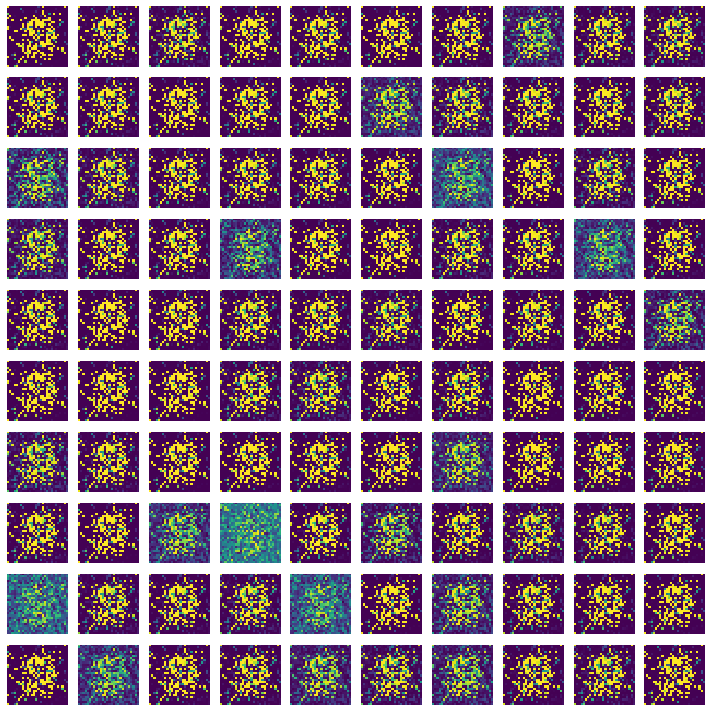

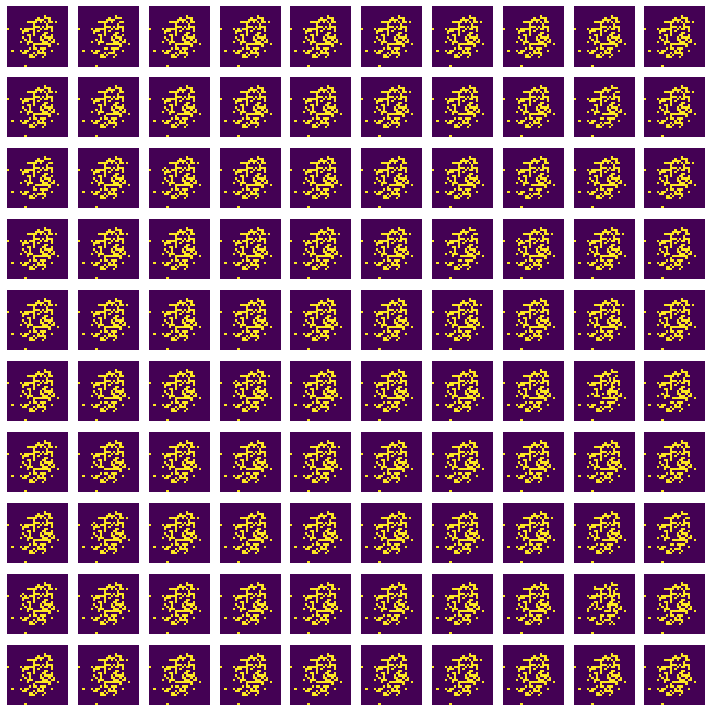

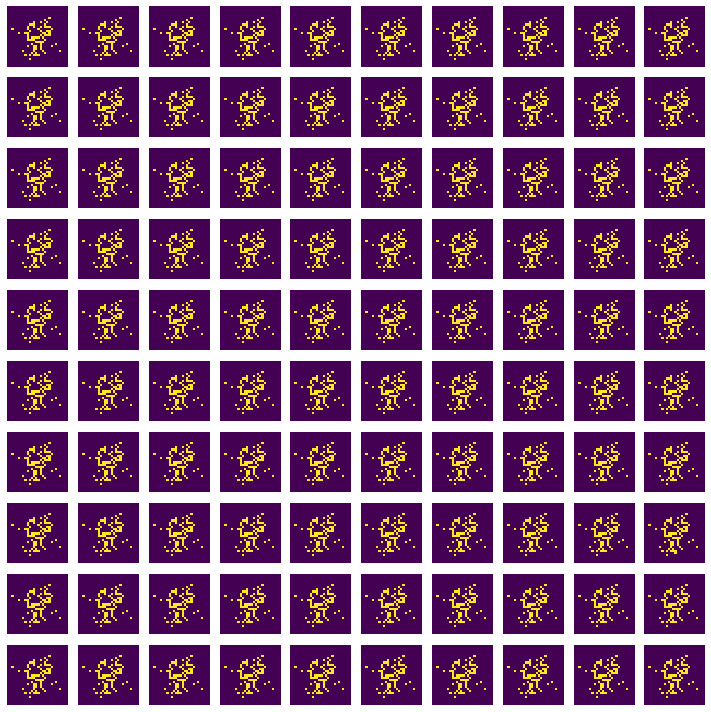

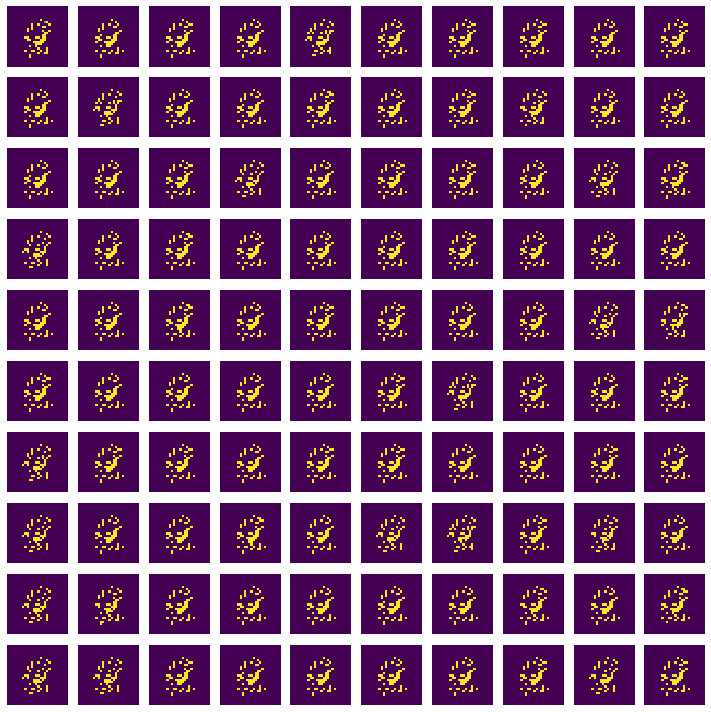

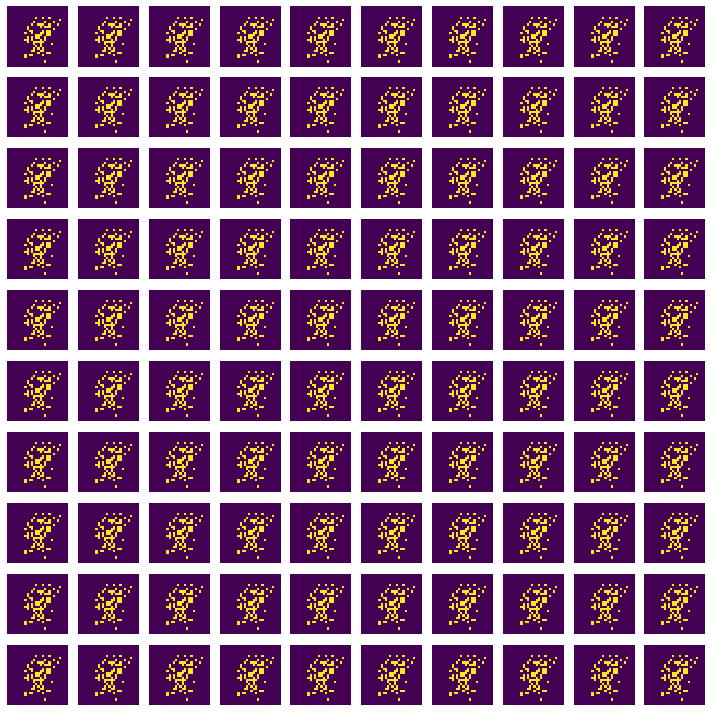

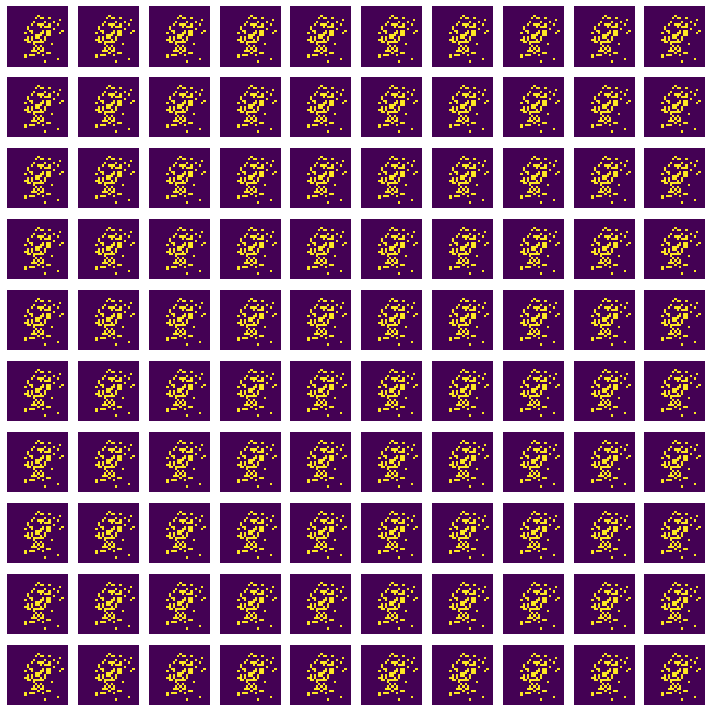

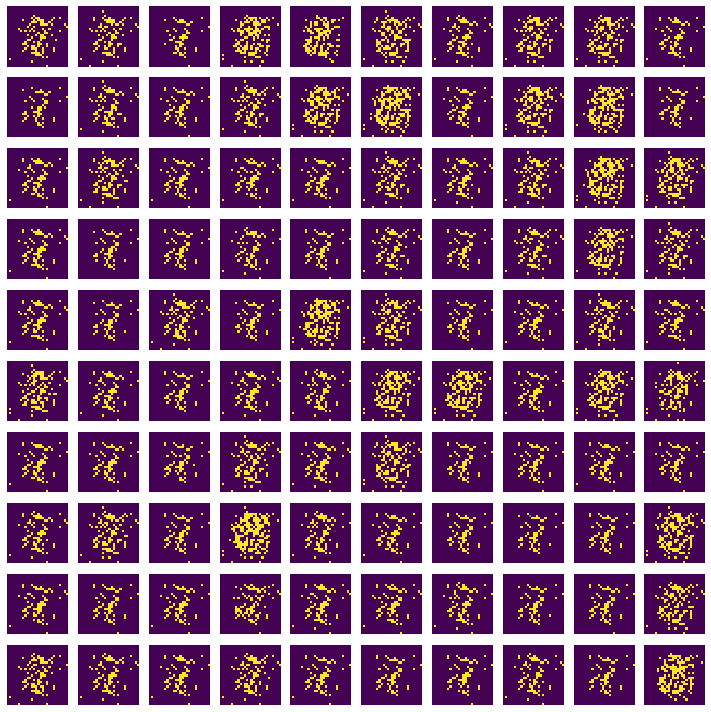

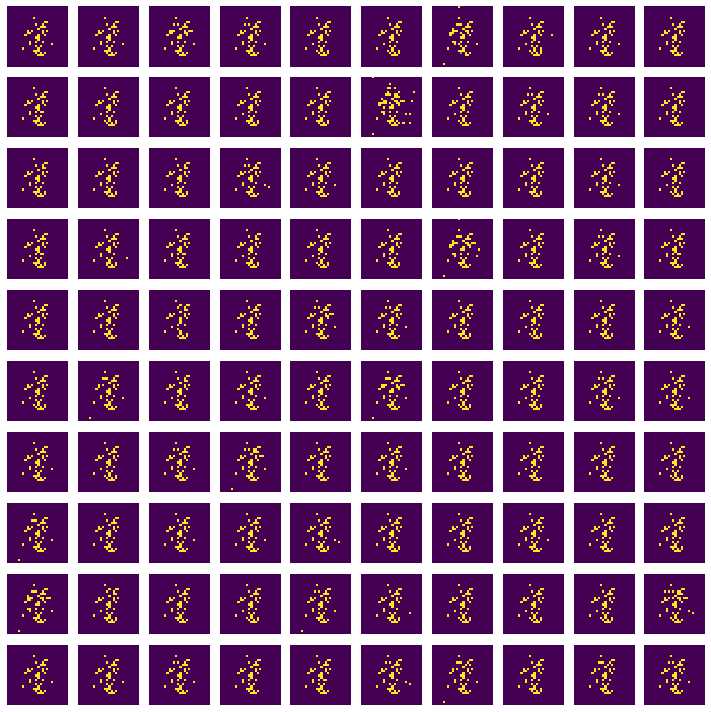

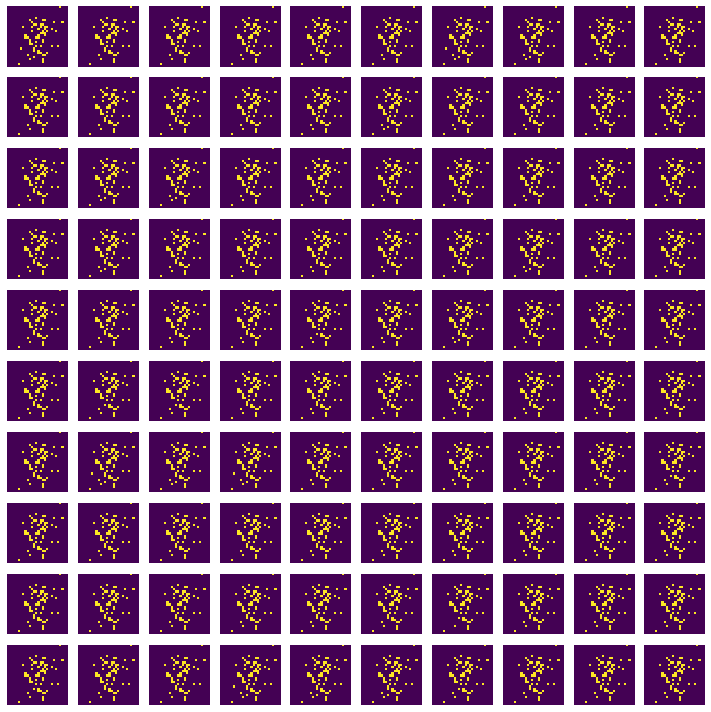

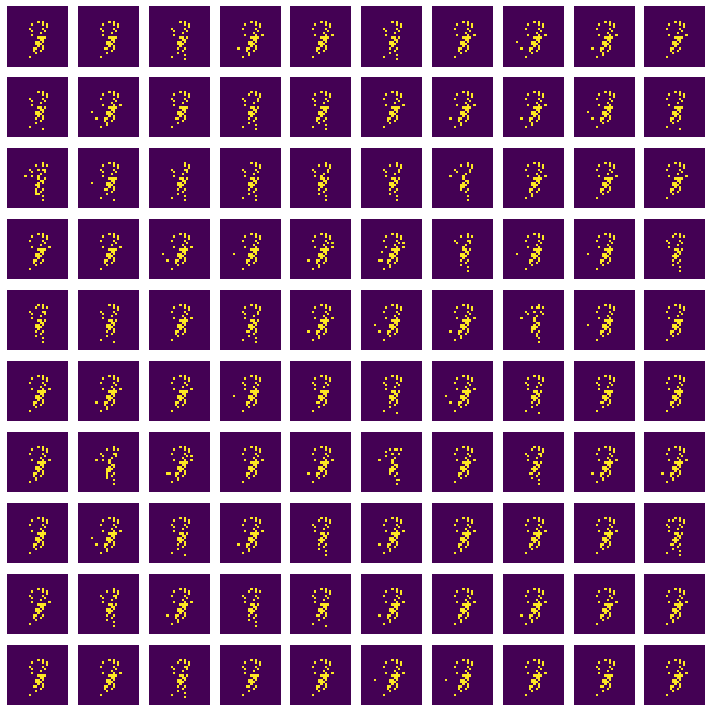

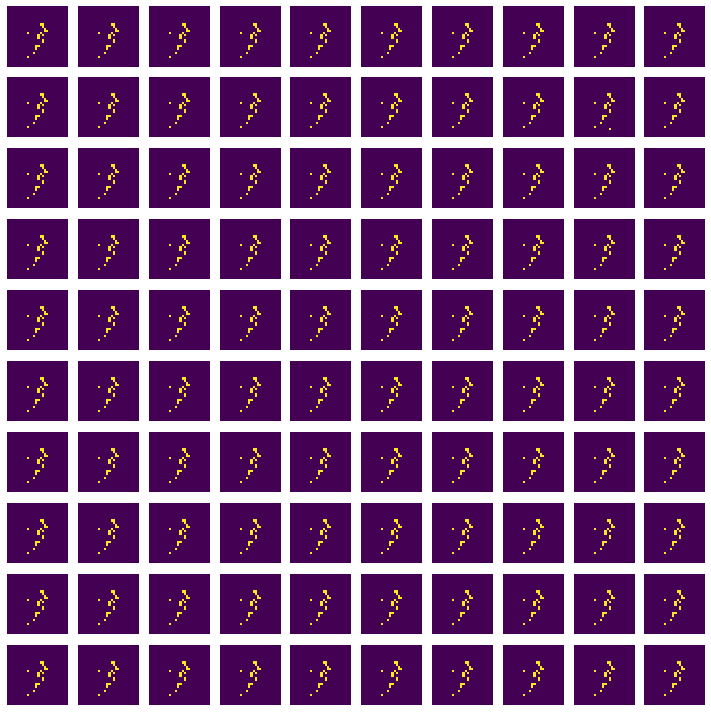

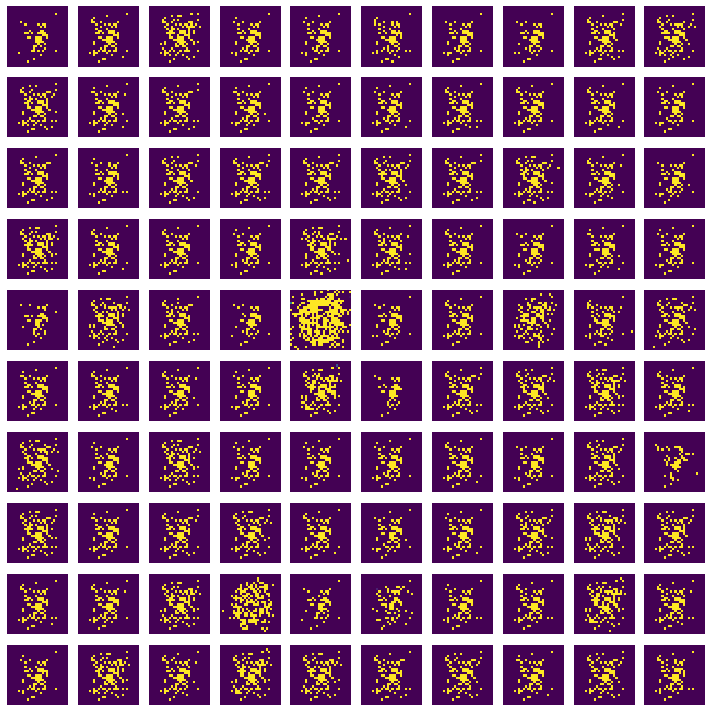

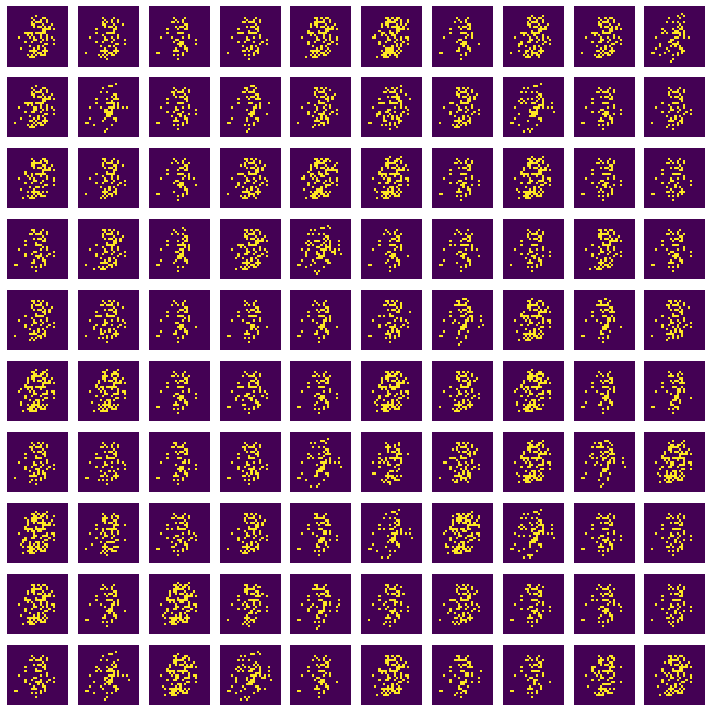

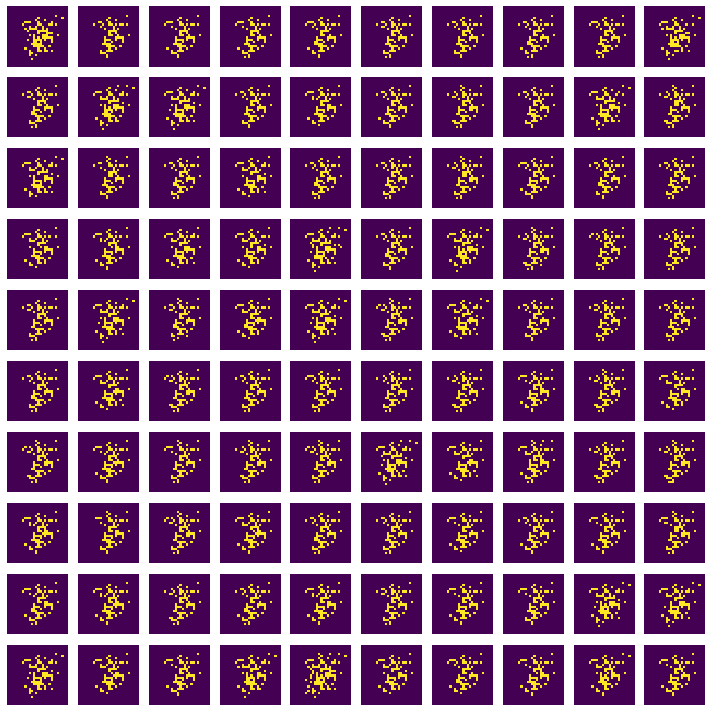

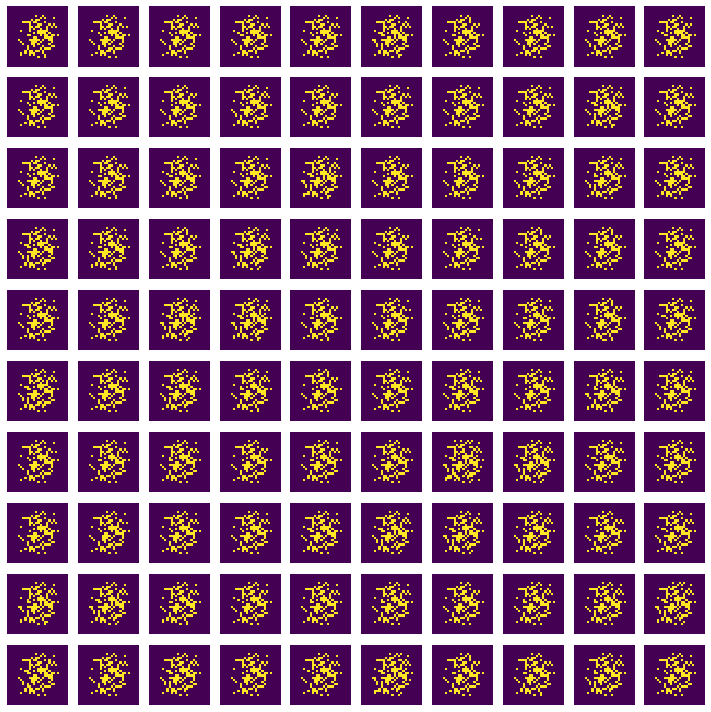

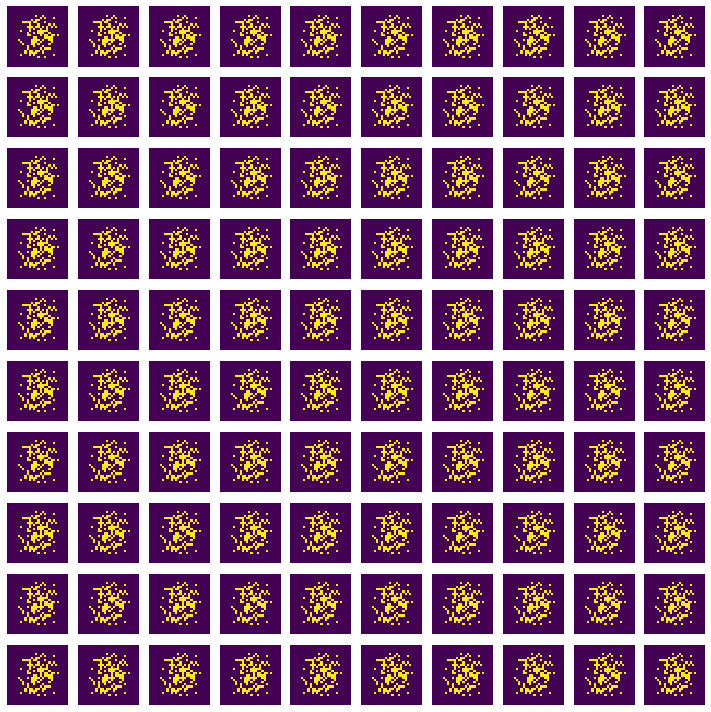

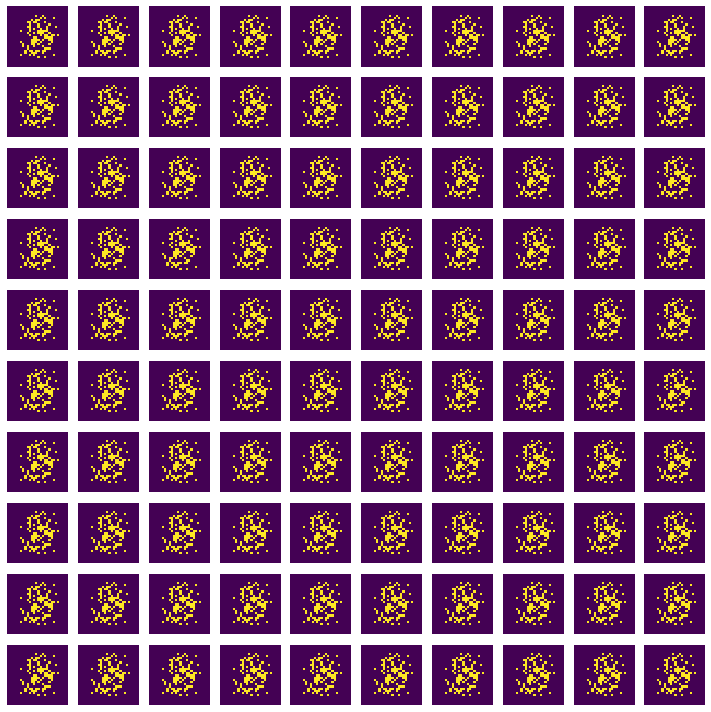

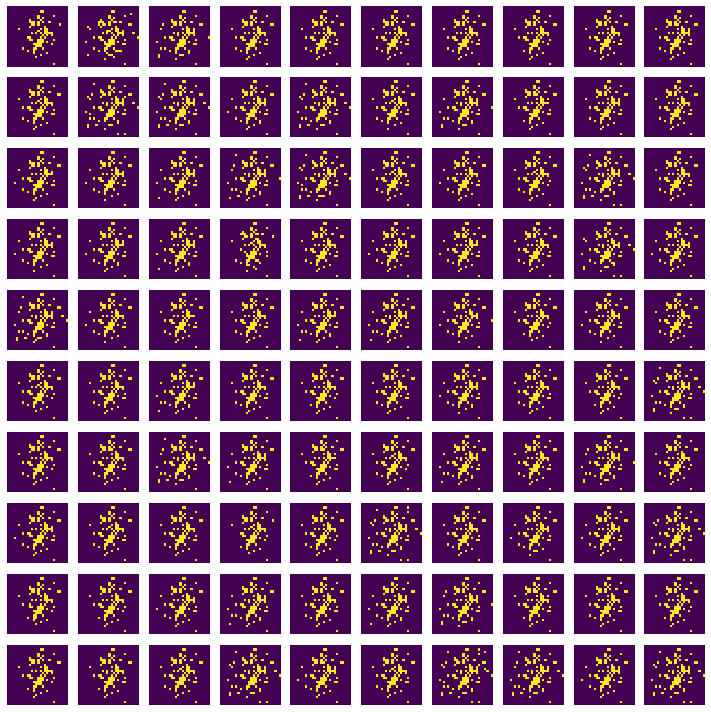

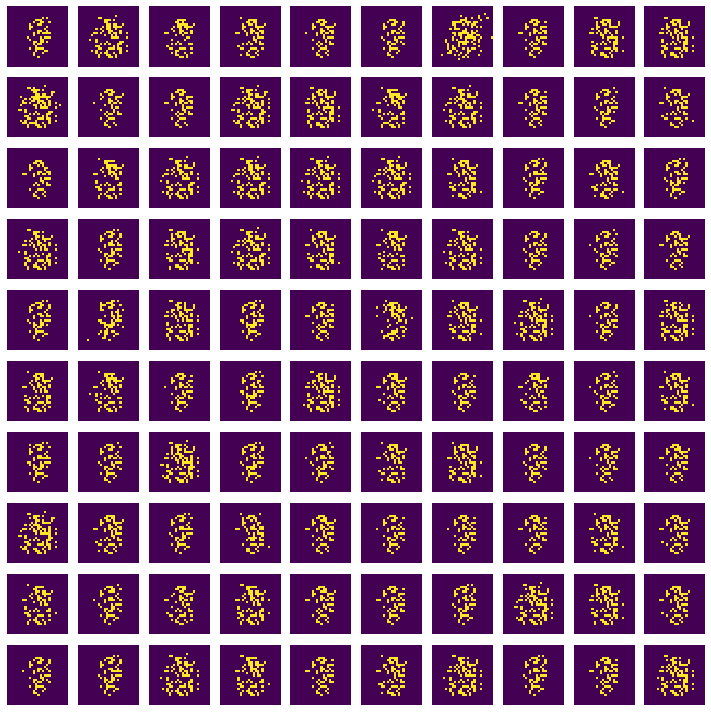

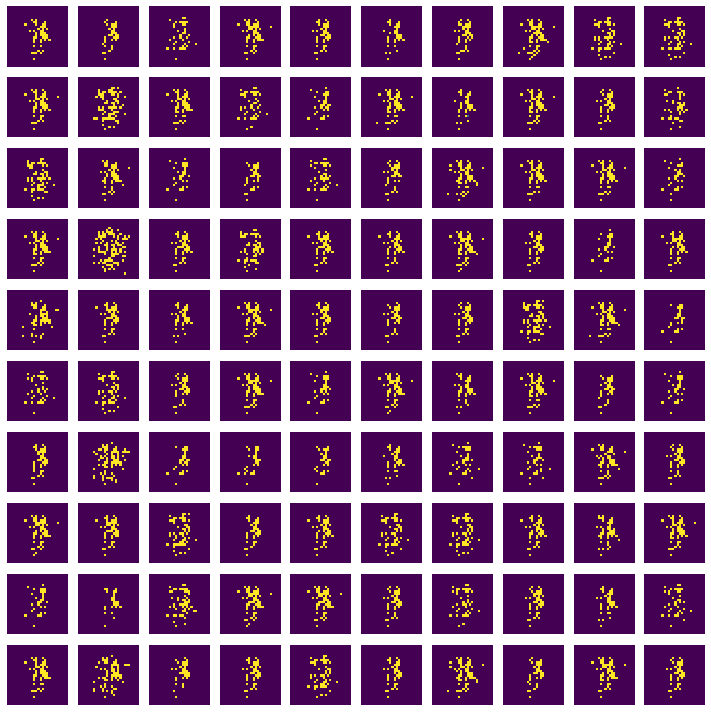

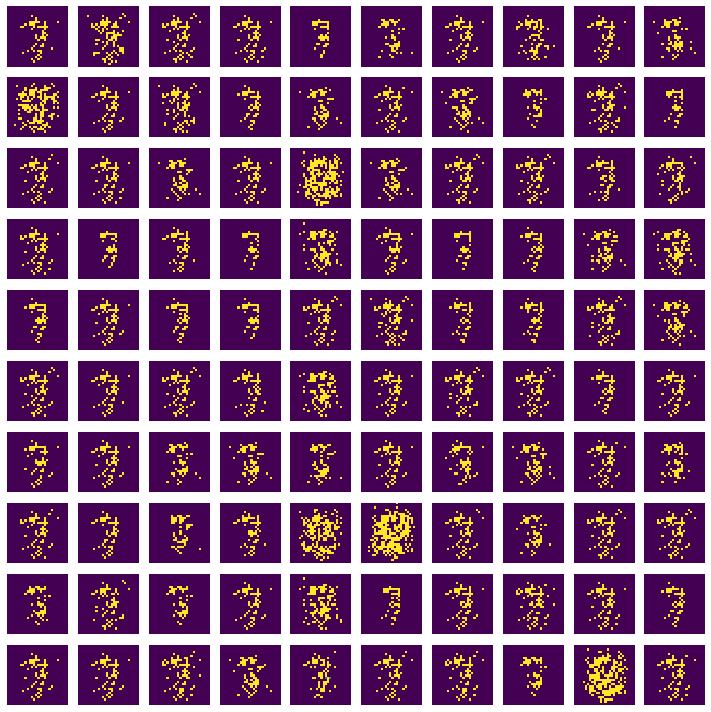

In [8]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)
training(400,128)